<a href="https://colab.research.google.com/github/sam2005-max/curn_prediction_test/blob/main/Credit_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assalomu aleykum bizning Anti-Risk loyihamizga hush kelibsiz!

In [ ]:
# :)
# Loyihaning Business Analysis tomonini ko'rish uchnu bu yerga kiring: ->https://medium.com/p/69270a79a2a2/edit
# Loyihaning System Analysys qismini ko'rish uchun bu yerga kiring: ->https://medium.com/@xamidovs005/machine-learning-credit-risk-baholash-loyihasi-ishlash-sistemasi-anti-risk-7a62bc6ded55

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate
import plotly.express as px






In [8]:
data = pd.read_csv('/content/credit_risk_dataset.csv')
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [10]:
data = pd.DataFrame(data[:1000])
print(data.shape)

(1000, 12)


In [11]:
# bu yerda biz kredit oluvchilar asosan nimalar uchun kredit olishlarini vizualizatsiya ko'rinishida chiqarganmiz.
data1 = data
DATA1 = data
royxatlar2 = []
a = data['loan_intent']
for i in a:
  royxatlar2.append(i)
d = {}
for sana in royxatlar2:
    d[sana] = royxatlar2.count(sana)
data = {"Words" : d.keys(), "Count" : d.values()}
dfg = pd.DataFrame(data)
dfg = dfg.sort_values("Count")
ready = dfg.tail()


fig = px.bar(ready, y="Words", x="Count", color=ready.index)
fig.show()

In [12]:
#Bu yerda biz kredit oluvchi shahsiy oy-joshaxsiyligini visual ko'rinishda chiqarganmiz
royxatlar2 = []
a = DATA1['person_home_ownership']
for i in a:
  royxatlar2.append(i)
d = {}
for sana in royxatlar2:
    d[sana] = royxatlar2.count(sana)
data = {"Words" : d.keys(), "Count" : d.values()}
dfg = pd.DataFrame(data)
dfg = dfg.sort_values("Count")
ready = dfg.tail()
fig = px.bar(ready, y="Words", x="Count", color=ready.index)
fig.show()

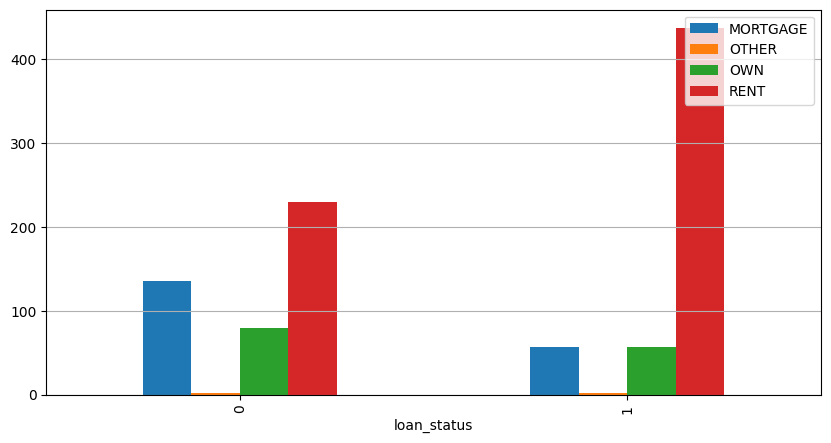

In [13]:
#Bu yerda biz kredit oluvchi shahsiy oy-joy ma'lumotlarini kredit holatiga solishtirgan holda chiqarganmiz
data1.groupby(['person_home_ownership','loan_status']).count()["loan_grade"].unstack(level = 0).plot(kind = 'bar', figsize=(10,5))
plt.grid(axis = 'y')
plt.legend(loc = 'upper right')

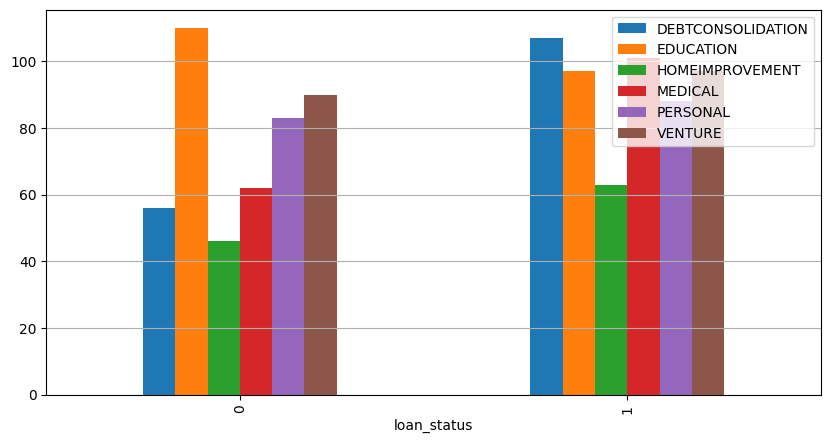

In [14]:
# Bu yerda biz kredit nima uchun olmoqchili ni kredit holatiga nisbatini chiqarganmiz
data1.groupby(['loan_intent','loan_status']).count()["loan_grade"].unstack(level = 0).plot(kind = 'bar', figsize=(10,5))
plt.grid(axis = 'y')
plt.legend(loc = 'upper right')

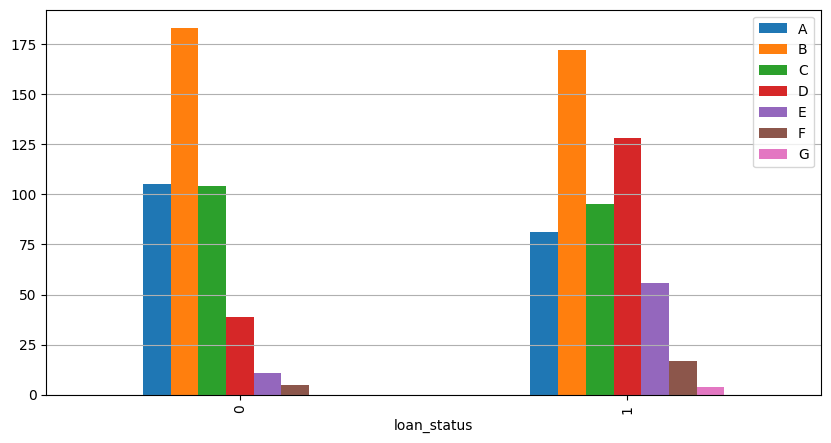

In [15]:
#Bu yerda biz kredit oluvchi krdit baho ma'lumotlarini kredit holatiga solishtirgan holda chiqarganmiz
data1.groupby(['loan_grade','loan_status']).count()["loan_intent"].unstack(level = 0).plot(kind = 'bar', figsize=(10,5))
plt.grid(axis = 'y')
plt.legend(loc = 'upper right')

In [16]:
# Bu yerda biz qabul qilingan va jad javob larni foizlarda chiqarganmiz
var_1 = 0
var_2 = 0
for i in data1['loan_status']:
  if i == 1:
    var_1 += 1
  elif i == 0:
    var_2 += 1
  acception = var_1 / (var_1 + var_2) * 100
  reject  = var_2 / (var_1 + var_2) * 100
print(f"qabul qilingan   {acception}%")
print(f"jad javob        {reject}%")

qabul qilingan   55.300000000000004%
jad javob        44.7%


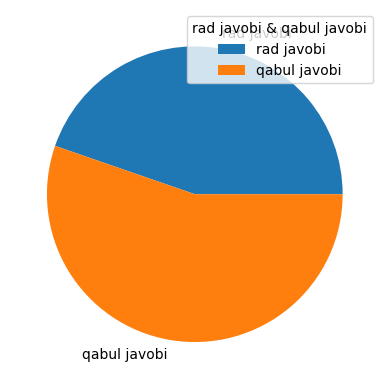

In [17]:
# Bu yerda biz qabul qilingan va jad javob larni piechar vizualizatsiya ko'rinishida chiqarganmiz
def visualise_piechart_Class_column(var_1,var_2):
  var_3 = [reject,acception]
  mylabels = ['rad javobi','qabul javobi']
  plt.pie(var_3, labels = mylabels)
  plt.legend(title = "rad javobi & qabul javobi", loc = 'upper right')
  plt.show()
  # plt.legend(loc = 'upper right')
visualise_piechart_Class_column(var_1,var_2)

In [18]:
# Data Cleaning Ma'lumotlarga ishlov berish
data1['person_home_ownership'] = data1['person_home_ownership'].str.replace('RENT', '0')
data1['person_home_ownership'] = data1['person_home_ownership'].str.replace('OWN', '1')
data1['person_home_ownership'] = data1['person_home_ownership'].str.replace('MORTGAGE', '2')
data1['person_home_ownership'] = data1['person_home_ownership'].str.replace('OTHER', '3')
data1['person_home_ownership'] = data1['person_home_ownership'].astype(int)
data1['loan_intent'] = data1['loan_intent'].str.replace('PERSONAL', '0')
data1['loan_intent'] = data1['loan_intent'].str.replace('EDUCATION', '1')
data1['loan_intent'] = data1['loan_intent'].str.replace('MEDICAL', '2')
data1['loan_intent'] = data1['loan_intent'].str.replace('VENTURE', '3')
data1['loan_intent'] = data1['loan_intent'].str.replace('HOMEIMPROVEMENT', '4')
data1['loan_intent'] = data1['loan_intent'].str.replace('DEBTCONSOLIDATION', '5')
data1['loan_intent'] = data1['loan_intent'].astype(int)
data1['loan_grade'] = data1['loan_grade'].str.replace('D', '0')
data1['loan_grade'] = data1['loan_grade'].str.replace('B', '1')
data1['loan_grade'] = data1['loan_grade'].str.replace('C', '2')
data1['loan_grade'] = data1['loan_grade'].str.replace('A', '3')
data1['loan_grade'] = data1['loan_grade'].str.replace('E', '4')
data1['loan_grade'] = data1['loan_grade'].str.replace('F', '5')
data1['loan_grade'] = data1['loan_grade'].str.replace('G', '6')
data1['loan_grade'] = data1['loan_grade'].astype(int)
data1['cb_person_default_on_file'] = data1['cb_person_default_on_file'].str.replace('Y', '0')
data1['cb_person_default_on_file'] = data1['cb_person_default_on_file'].str.replace('N', '1')
data1['cb_person_default_on_file'] = data1['cb_person_default_on_file'].astype(int)




In [19]:
data1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,0,123.0,0,0,35000,16.02,1,0.59,0,3
1,21,9600,1,5.0,1,1,1000,11.14,0,0.10,1,2
2,25,9600,2,1.0,2,2,5500,12.87,1,0.57,1,3
3,23,65500,0,4.0,2,2,35000,15.23,1,0.53,1,2
4,24,54400,0,8.0,2,2,35000,14.27,1,0.55,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,46610,0,6.0,5,1,18000,10.71,1,0.39,1,3
996,24,48000,0,5.0,0,3,18000,6.54,1,0.38,1,2
997,23,24000,1,0.0,0,3,8000,5.79,0,0.33,1,3
998,25,55000,0,2.0,1,2,18000,12.84,1,0.33,1,2


In [20]:
# Ma'lumotlar haqida infarmatsiya
def isnull_of_train_data(data):
  print(data.info())
isnull_of_train_data(data1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  1000 non-null   int64  
 1   person_income               1000 non-null   int64  
 2   person_home_ownership       1000 non-null   int64  
 3   person_emp_length           970 non-null    float64
 4   loan_intent                 1000 non-null   int64  
 5   loan_grade                  1000 non-null   int64  
 6   loan_amnt                   1000 non-null   int64  
 7   loan_int_rate               898 non-null    float64
 8   loan_status                 1000 non-null   int64  
 9   loan_percent_income         1000 non-null   float64
 10  cb_person_default_on_file   1000 non-null   int64  
 11  cb_person_cred_hist_length  1000 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 93.9 KB
None


In [21]:
# ma'lumotlar ichidagi yo'q (null) qiymatlar ma'lumotlarga ishlov berilishidan oldin
def isnull_of_train_data(data):
  print(data.isnull().sum())
isnull_of_train_data(data1)

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length              30
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                 102
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64


In [22]:
# Ma'llumotlarni ichidagi yo'q (null) qiymatlarni to'ldirib chiqamiz 0 va o'rtacha (mean) qiymatlar bilan
data1['loan_int_rate'].fillna(data1['loan_int_rate'].mean(), inplace=True)
data1['person_emp_length'].fillna(0, inplace=True)

In [23]:
# Ma'lumotlarni ichidagi yo'q (null) qiymatlar ma'lumotlarga ishlov berilgandan so'ng
def isnull_of_train_data(data):
  print(data.isnull().sum())
isnull_of_train_data(data1)

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


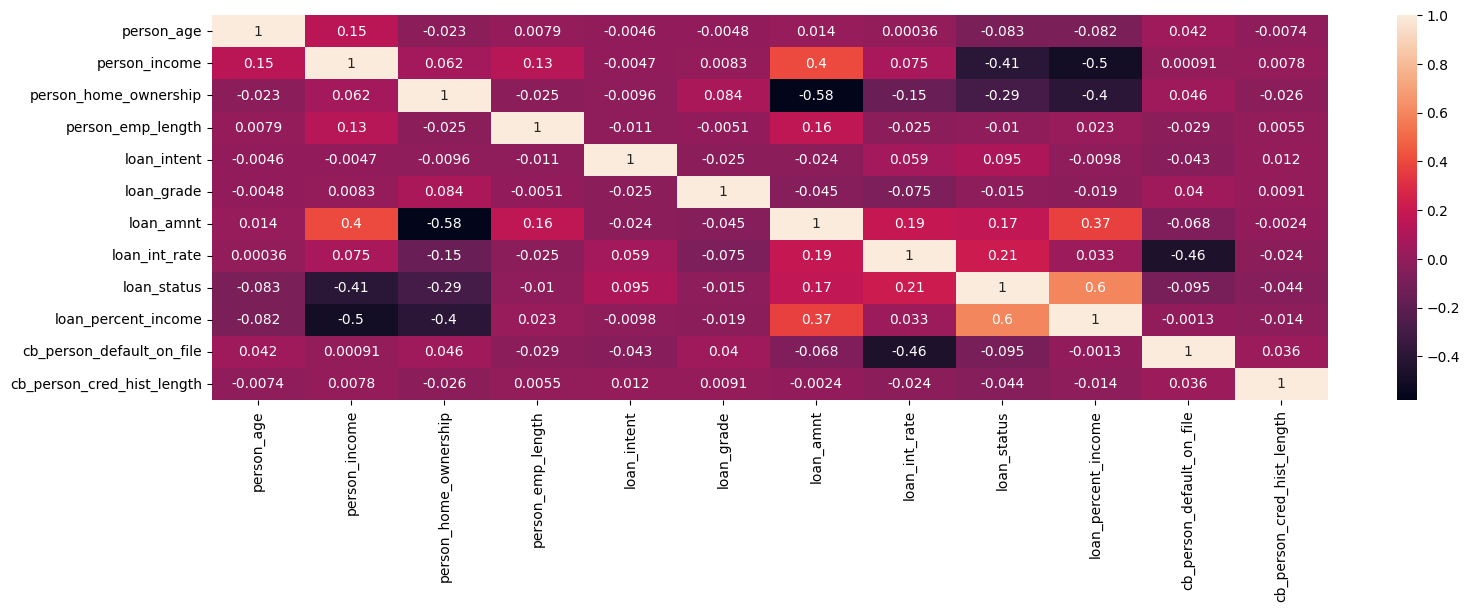

In [24]:
# Ma'lumotlarni bir biriga bo'lgan korelyatsiyasini (bog'liqligini) visualizatsiya orqali tekshiramiz
def compute_correlations_matrix_with_seaborn_visualization(data):
  cor=data.corr()
  plt.subplots(figsize=(18,5))
  sns.heatmap(cor,annot=True)
compute_correlations_matrix_with_seaborn_visualization(data1)

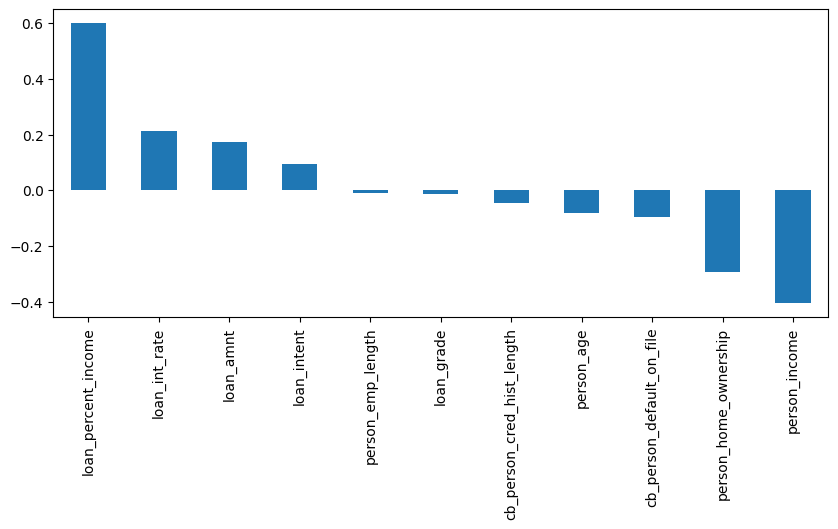

In [25]:
# maqsad va xususiyatlar o'rtasidagi korrelyatsiyani vizual ko'rinishda tekshirish
conti_df= data1.select_dtypes(exclude=[object])
corr_with_tot_count = conti_df.corr()["loan_status"].sort_values(ascending=False)
plt.figure(figsize=(10,4))
corr_with_tot_count.drop("loan_status").plot.bar()
plt.show()

In [26]:
# Ma'lumotlarni "Kredit statusiga" bo'lan matematik nisbatini aniqlaymiz"
def compute_correlations_price_ratio(dataset):
  correlations = dataset.corr()
  res = correlations["loan_status"].abs().sort_values(ascending=False)
  print(res)
compute_correlations_price_ratio(data1)

loan_status                   1.000000
loan_percent_income           0.599644
person_income                 0.406383
person_home_ownership         0.293146
loan_int_rate                 0.211278
loan_amnt                     0.172195
cb_person_default_on_file     0.095479
loan_intent                   0.095369
person_age                    0.082789
cb_person_cred_hist_length    0.044491
loan_grade                    0.014516
person_emp_length             0.010427
Name: loan_status, dtype: float64


              precision    recall  f1-score   support

           0       0.92      0.99      0.95        89
           1       0.99      0.93      0.96       111

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200

Model aniqligi: 0.955


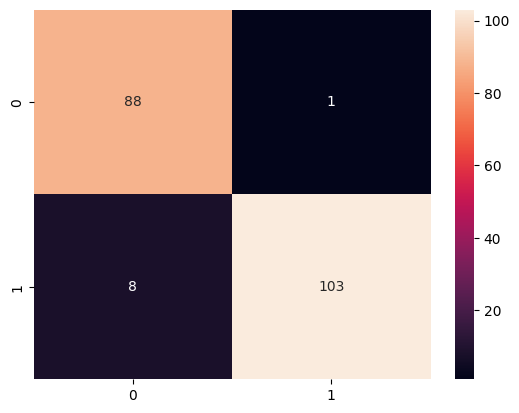

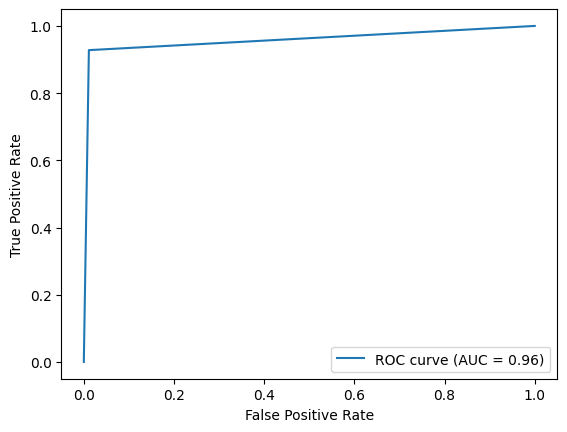

In [29]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.datasets import load_iris
from sklearn import metrics
# moljal qaratilgan ma'lumotni olamiz va keraksizlarini o'chirib tashlaymiz
X = data1.drop(['loan_status', 'cb_person_default_on_file'],axis=1)
y = data1['loan_status']

# Ma'lumotlarni train qildirish uchun bo'lib olamiz
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=33)

# model parametrlari
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50,max_leaf_nodes = 30)
# Modelni yaratamiz (training)
model_rf.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = model_rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        89
           1       0.87      0.93      0.90       111

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.88       200
weighted avg       0.88      0.88      0.88       200

Model aniqligi: 0.88


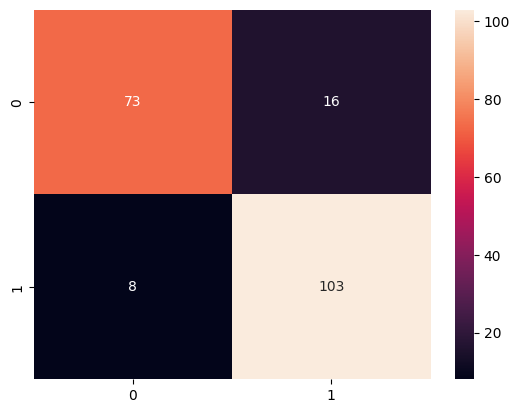

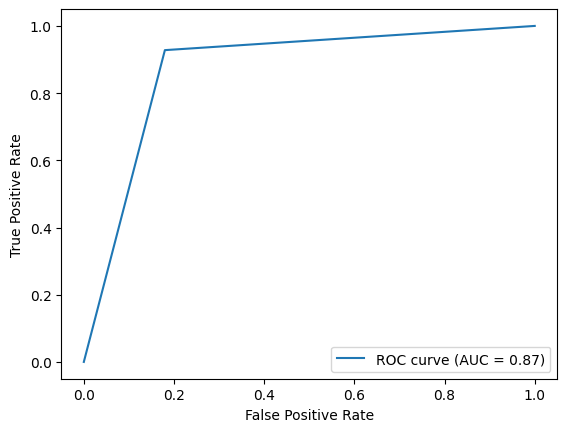

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn import metrics
# Modelni yaratamiz (training)
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [31]:
# for_test = data1[1:2]
# for_test = for_test.drop(['loan_status', 'cb_person_default_on_file'],axis=1)
# for_test = pd.read_csv("/content/test_1ga_moil.csv")
# for_test = for_test.drop(["Unnamed: 0"],axis=1)
# status = int(model_rf.predict(for_test))
# print(f"Kredit holati': {status}")

In [32]:
# for_test.to_csv("test_0ga_moil.csv")